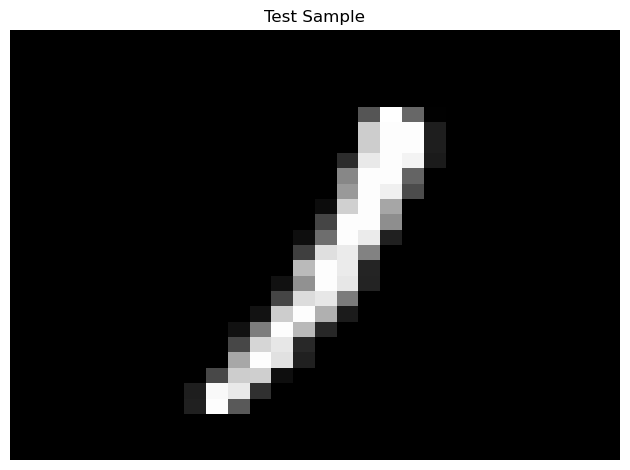

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  85 255 103   1   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0 205 253 253  30   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 205 253 253  30
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  44 233 253 244  27   0   0   

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
import cvxpy as cp
from scipy.optimize import minimize
import numpy.linalg as la
# Function to read MNIST data from CSV filey
def read_mnist_csv(filename):
    return pd.read_csv(filename, header=None).values[:, 1:]  # Exclude the label column

# Path to the MNIST dataset
data_path = "mnist_dataset"

# Read MNIST train and test images from CSV files
train_images = read_mnist_csv(os.path.join(data_path, 'mnist_train.csv'))
test_images = read_mnist_csv(os.path.join(data_path, 'mnist_test.csv'))

"""
print(train_images.shape) = (60000, 784)

"""

Test_sample = train_images[99]

# image show Test_sample
plt.imshow(Test_sample.reshape(-28, 28), cmap='gray', aspect = 'auto')
plt.title(f'Test Sample')
plt.axis('off')
plt.tight_layout()
plt.show()

print(Test_sample)

In [2]:
# count the number of non-zero entries in Test_sample
print(np.count_nonzero(Test_sample))

84


In [9]:
def generate_random_matrix(M, n_cols):
    while True:
        # Initialize an empty matrix
        matrix = np.zeros((M, n_cols))

        # Generate random values for each column
        for i in range(n_cols):
            # Generate a random column
            column = np.random.normal(loc=0, scale=1/np.sqrt(M), size=(M,))
            
            # Ensure the column is linearly independent from previous columns
            for j in range(i):
                # Subtract the projection of the new column onto previous columns
                column -= np.dot(matrix[:, j], column) * matrix[:, j]

            # Normalize the column to ensure its L2 norm is 1
            column /= np.linalg.norm(column)

            # Set the column in the matrix
            matrix[:, i] = column
        
        # Check if the rank condition is satisfied
        if np.linalg.matrix_rank(matrix) == M:
            break
    
    return matrix

In [10]:
def CoSAMP(Phi, u, K, tol, max_iter):
    
    # Initialization
    
    Sest = np.zeros((np.shape(Phi)[1],1))
    v = u
    t = 0
    halt = False
    num_precision = 1e-12
    T = np.array([])
    
    while t<= max_iter and not halt:
        y = np.abs(np.dot(Phi.T,v))
        
#        target = np.sort(y)[::-1][2*K]
#        Omega = [i for (i, val) in enumerate(y)
#                 if val > target and val > num_precision]
        Omega = np.argpartition(-abs(y), 2*K)
        Omega = Omega[:2*K]
        Omega = Omega[abs(y[Omega]) > num_precision]
        
        T = np.union1d(Omega, T)
        T = T.astype(int)
        b ,_ ,_ ,_ = la.lstsq(Phi[:,T], u, rcond=None)
        
        Kgoodindices = np.argpartition(-abs(b), K)
        Kgoodindices = Kgoodindices[:K]
        Kgoodindices = Kgoodindices[abs(b[Kgoodindices]) > num_precision]
        
        T = T[Kgoodindices]
        Sest = np.zeros(np.shape(Phi)[1])
        b = b[Kgoodindices]
        Sest[T] = b
        v = u - np.dot(Phi[:,T],b)
        t = t+1
        
        halt = la.norm(v)/la.norm(u) < tol
        
    return Sest

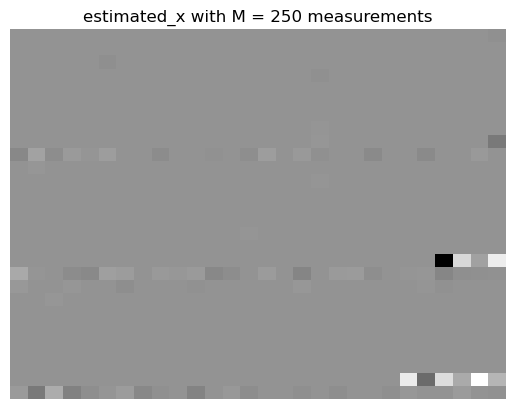

[     0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.           -434.71455099
      0.              0.              0.              0.
    342.95404068      0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.           -740.53798652      0.              0.
      0.              0.              0.              0.
      0.              0

In [11]:
np.random.seed(42)  # set the random seed
M = 250 # number of measurements
A = generate_random_matrix(M, 784)
###

y = np.dot(A, Test_sample)
estimated_x = CoSAMP(A, y, 84, 1e-12, 5000)
###

# reshape estimated_x to 28x28 image
plt.imshow(estimated_x.reshape(-28, 28), cmap='gray', aspect='auto')
plt.title(f'estimated_x with M = {M} measurements')
plt.axis('off')
plt.show()    
print(estimated_x)

0
1
2
3
4
5
6
7
8
9
10
11


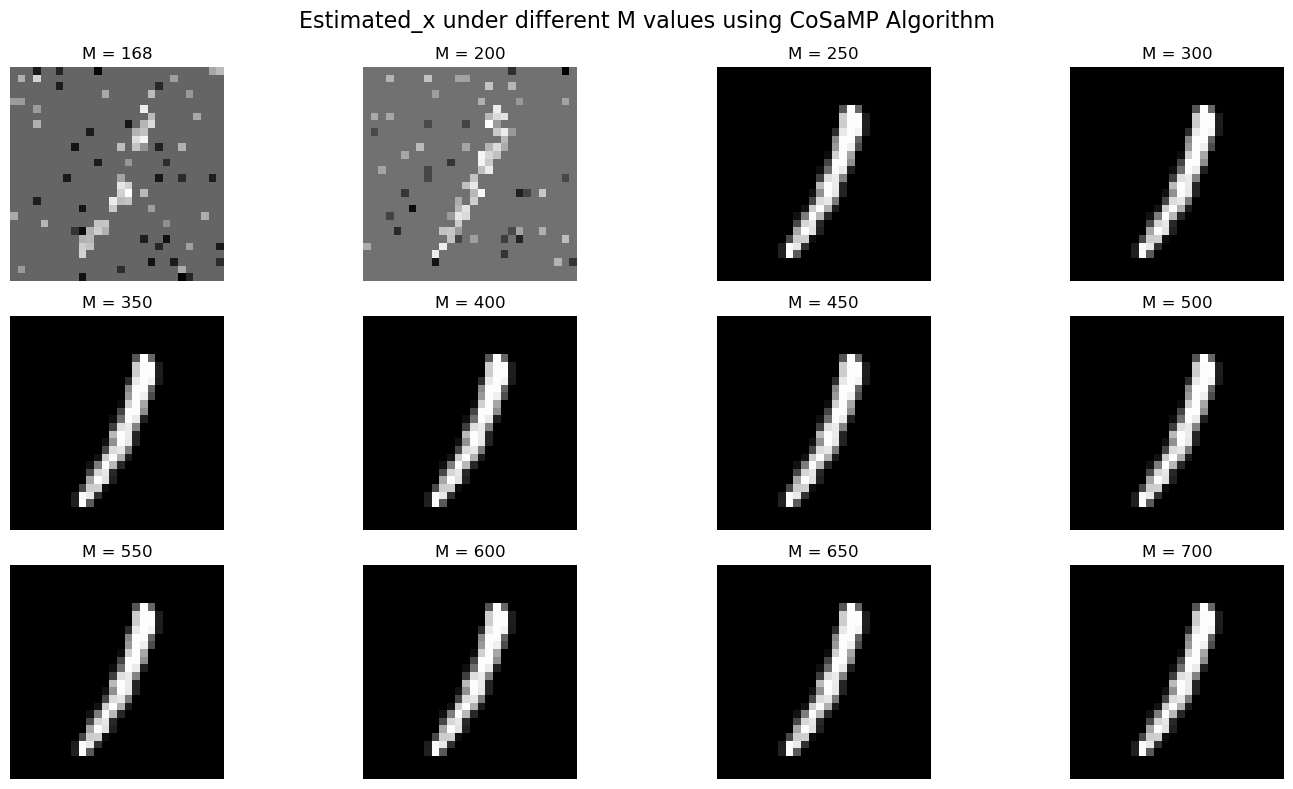

In [13]:
# Define your functions generate_random_matrix and orthogonal_matching_pursuit here

np.random.seed(42)  # set the random seed

# Number of measurements
M = [168, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700]
MSE = []
Recovered_x = []
for i in range(len(M)):  
    A = generate_random_matrix(M[i], 784)
    y = np.dot(A, Test_sample)
    estimated_x = CoSAMP(A, y, 84, 1e-12, 1000)
    Recovered_x.append(estimated_x)
    diff = Test_sample - estimated_x
    diff = diff / 255.0
    MSE.append(np.linalg.norm(diff))
    print(i)

# Reshape estimated_x to 28x28 image and plot
plt.figure(figsize=(15, 8))
for i in range(len(M)):
    plt.subplot(3, 4, i+1)
    plt.imshow(Recovered_x[i].reshape(28, 28), cmap='gray')
    plt.title(f'M = {M[i]}')
    plt.axis('off')

plt.suptitle('Estimated_x under different M values using CoSaMP Algorithm', fontsize=16)
plt.tight_layout()
plt.show()

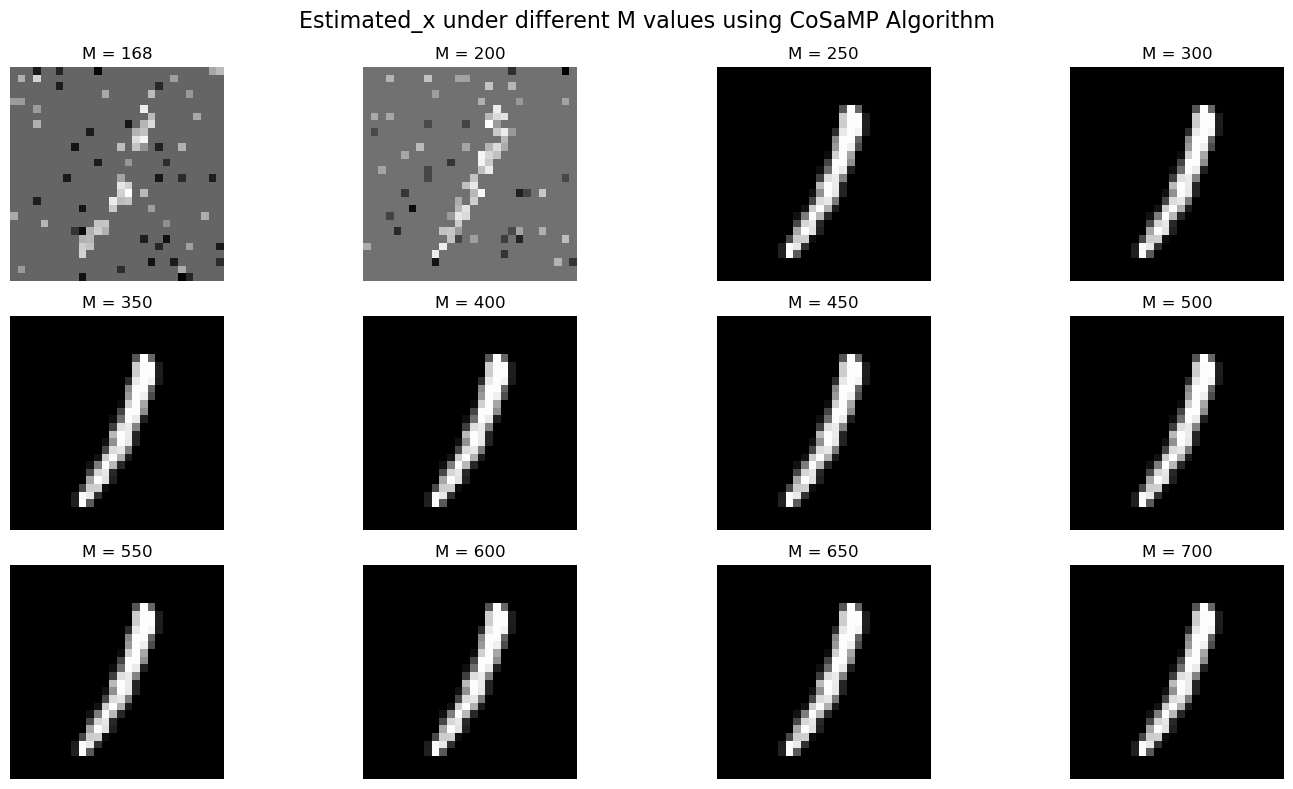

In [9]:
# Reshape estimated_x to 28x28 image and plot
plt.figure(figsize=(15, 8))
for i in range(len(M)):
    plt.subplot(3, 4, i+1)
    plt.imshow(Recovered_x[i].reshape(28, 28), cmap='gray')
    plt.title(f'M = {M[i]}')
    plt.axis('off')

plt.suptitle('Estimated_x under different M values using CoSaMP Algorithm', fontsize=16)
plt.tight_layout()
plt.show()

In [14]:
print(MSE)

[5.390470890885065, 4.819055171841997, 1.8457372548447877e-14, 1.1494723818143471e-14, 5.964376388246502e-14, 1.3281277473244719e-14, 1.4963161651784656e-14, 1.0786059672663844e-14, 1.0057089942211081e-14, 1.5250390703384015e-14, 1.1416877496983163e-14, 1.2388220833019917e-14]
